## Step 01. Check the colab enviroment

In [ ]:
'''import tensorflow as tf
print(tf.test.gpu_device_name())

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())'''

!cat /proc/meminfo

import torch

print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

# additional info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


MemTotal:       13297228 kB
MemFree:         2213116 kB
MemAvailable:   12269284 kB
Buffers:          428904 kB
Cached:          9529088 kB
SwapCached:            0 kB
Active:          1035556 kB
Inactive:        9540052 kB
Active(anon):       1432 kB
Inactive(anon):   546144 kB
Active(file):    1034124 kB
Inactive(file):  8993908 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               648 kB
Writeback:             0 kB
AnonPages:        617704 kB
Mapped:           268816 kB
Shmem:              1180 kB
KReclaimable:     354060 kB
Slab:             395304 kB
SReclaimable:     354060 kB
SUnreclaim:        41244 kB
KernelStack:        5296 kB
PageTables:        12620 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    3231932 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       45868 kB
VmallocChunk:          0 kB
Percpu:          

## Step 02. Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Step 03. Download YOLOv4 PyTorch repo

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# %cd /content/gdrive/My\ Drive
# %mkdir colab
%cd /content/gdrive/My\ Drive/colab
#!rm -rf pytorch-YOLOv4
#!git clone https://github.com/EdricJ/pytorch-YOLOv4
%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4

/content/gdrive/My Drive/colab
/content/gdrive/My Drive/colab/pytorch-YOLOv4


## Step 04. Set up YOLOv4 PyTorch Environment

### install all library needed

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###set up weights data

In [ ]:
#import gdown

%cd /content/gdrive/My\ Drive/colab
!rm -rf weights
%mkdir weights

%cd /content/gdrive/My\ Drive/colab/weights

#*************** NOTE: If you use this method to download the weight dataset, the file you download will not be in the correct format and the training will not work **************
#*************** PLEASE click into Link, which you want to download weight dataset, download it to your computer and upload back to your current work ***************************** 

#url = "https://drive.google.com/file/d/1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA/view?fbclid=IwAR1f2ZdWo5a_P0wc-hjaQzv5dhT0B874z2z2hqx3TJtRiyeZkUlrnDr3okg"
#output = "yolov4.conv.137.pth"
#gdown.download(url, output, quiet=False)

# down yolov4.conv.137.pth
#!gdown https://drive.google.com/file/d/1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA/view?fbclid=IwAR1f2ZdWo5a_P0wc-hjaQzv5dhT0B874z2z2hqx3TJtRiyeZkUlrnDr3okg -O yolov4.conv.137.pth


/content/gdrive/My Drive/colab
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 74083    0 74083    0     0   174k      0 --:--:-- --:--:-- --:--:--  174k


### Step 04.1.1 Unzip dataset / manual in Google Drive

In [ ]:
!rm -rf /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip

%cd /content/gdrive/My\ Drive/colab
!rm -rf data
%mkdir data
%cd /content/gdrive/My\ Drive/colab/data
!git clone https://github.com/EdricJ/chess_pieces_data_v1
!unzip /content/gdrive/My\ Drive/colab/data/chess_pieces_data_v1/ChessPieces.v1-416x416auto-orient.yolov4pytorch.zip -d /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   902    0     0     28      0  0:00:32  0:00:31  0:00:01   199
100 16.2M  100 16.2M    0     0   519k      0  0:00:32  0:00:32 --:--:--  519k
Archive:  roboflow.zip
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/README.dataset.txt  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/README.roboflow.txt  
   creating: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
 extracting: /content/gdrive/My Drive/colab/pytorch-YOLOv4/data_unzip/test/2f6fb003bb89cd40132

### Step 04.1.2 Prepare dataset & weights (by unzip file)


In [ ]:
%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4

!rm -rf train
%mkdir train
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/_annotations.txt train/train.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/_classes.txt train/_classes.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/_annotations.txt train.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/train/*.jpg train/
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/valid/*.jpg train/

!rm -rf data
%mkdir data
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/valid/_annotations.txt data/val.txt

!rm -rf test
%mkdir test
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/test/_classes.txt test/_classes.txt
%cp /content/gdrive/My\ Drive/colab/pytorch-YOLOv4/data_unzip/test/*.jpg test/

/content/gdrive/My Drive/colab/pytorch-YOLOv4


### Step 04.2 Prepare dataset & weights (manual upload to Google Drive)


In [ ]:
# %cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4

# !rm -rf train
# %mkdir train
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/train/_annotations.txt train/train.txt
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/train/_classes.txt train/_classes.txt
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/train/_annotations.txt train.txt
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/train/*.jpg train/
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/valid/*.jpg train/

# !rm -rf data
# %mkdir data
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/valid/_annotations.txt data/val.txt

# !rm -rf test
# %mkdir test
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/test/_classes.txt test/_classes.txt
# %cp /content/gdrive/My\ Drive/colab/data/ChessPieces.v1-416x416auto-orient.yolov4pytorch/test/*.jpg test/

### Step 04.3 Check the number of classes

In [ ]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')
print(num_classes)

13


## Step 05. Training

### copy file to pytorch

In [ ]:
# prepare pre-trained weights

# copy converted pre-trained weights
%cp /content/gdrive/My\ Drive/colab/weights/yolov4.conv.137.pth yolov4.conv.137.pth

### start training

In [ ]:
# Commented out IPython magic to ensure Python compatibility.

# Commented out IPython magic to ensure Python compatibility.
#start training
# -b batch size (you should keep this low (2-4) for training to work properly)
# -s number of subdivisions in the batch, this was more relevant for the darknet framework
# -l learning rate
# -g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
# classes - number of classes
#dir - where the training data is
#epoch - how long to train for

%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4
!python train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

# continue training from the checkpoints
#Yolov4_epoch*.pth / * is the number between 1 - 50

#!python train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained ./checkpoints/Yolov4_epoch1.pth -classes {num_classes} -dir ./train -epochs 50


/content/gdrive/My Drive/colab/pytorch-YOLOv4
log file path:log/log_2022-12-08_05-08-54.txt
2022-12-08 05:08:54,028 train.py[line:435] INFO: Using device cuda
Traceback (most recent call last):
  File "train.py", line 437, in <module>
    model = Yolov4(cfg.pretrained,n_classes=cfg.classes)
  File "/content/gdrive/My Drive/colab/pytorch-YOLOv4/models.py", line 398, in __init__
    pretrained_dict = torch.load(yolov4conv137weight)
  File "/usr/local/lib/python3.8/dist-packages/torch/serialization.py", line 529, in load
    return _legacy_load(opened_file, map_location, pickle_module, **pickle_load_args)
  File "/usr/local/lib/python3.8/dist-packages/torch/serialization.py", line 692, in _legacy_load
    magic_number = pickle_module.load(f, **pickle_load_args)
_pickle.UnpicklingError: invalid load key, '<'.


## Step 06. Test the results

Streaming output truncated to the last 5000 lines.
black-pawn: 0.526336
white-pawn: 0.149251
black-pawn: 0.173580
white-pawn: 0.142479
black-king: 0.251502
white-queen: 0.265207
bishop: 0.231178
white-queen: 0.136090
black-queen: 0.132464
black-queen: 0.226751
black-knight: 0.172646
black-king: 0.280290
black-queen: 0.180337
black-pawn: 0.223352
white-pawn: 0.170938
black-pawn: 0.495359
black-queen: 0.127034
white-pawn: 0.206618
white-knight: 0.170689
black-bishop: 0.172977
white-pawn: 0.191096
bishop: 0.161374
black-pawn: 0.190888
white-king: 0.176928
white-pawn: 0.263374
white-pawn: 0.174817
white-pawn: 0.483609
bishop: 0.246213
white-pawn: 0.139978
black-queen: 0.122331
black-queen: 0.135395
black-knight: 0.217959
black-knight: 0.238228
black-king: 0.116811
white-queen: 0.256211
black-knight: 0.130643
white-queen: 0.198726
black-bishop: 0.300696
white-pawn: 0.152517
black-bishop: 0.172679
white-bishop: 0.141611
black-king: 0.297678
black-bishop: 0.117383
white-bishop: 0.133044
black

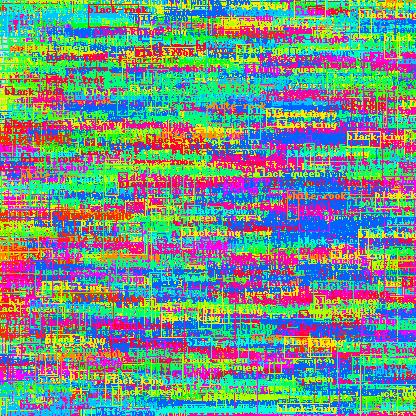

In [ ]:
# Check the trained weights

%cd /content/gdrive/My\ Drive/colab/pytorch-YOLOv4

!ls checkpoints

# Choose random test image

import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

print(img_path)

# Run test for a random image using a chosen checkpoints and visualization the result
#Yolov4_epoch*.pth / * is the number between 1 - 50 

!python models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

from IPython.display import Image
Image('predictions.jpg')